#**Preámbulo**

Este caso de uso esta destinado para enseñar de manera resumida qué es el modelo de Solow y para qué se usa en la vida real. Además muestro como aplicarlo de manera práctica para un país usando Python y qué variables son las relevantes a la hora de crear un dataset. 

Si se quiere profundizar en el andamiaje matemático o teórico del mismo dejaré en bibliografia algunos libros y publicaciones útiles para profundizar en ello.

#**1.Introducción**

El modelo de Solow sirve, principalmente, para explicar el crecimiento económico de un país. Por ejemplo, si yo como investigador quiero tratar de descubrir por qué España ha crecido un 6% este año, puedo usar el modelo de Solow para tratar de descomponer ese crecimiento en tres variables: Capital, trabajo y productividad.

De esta manera, puedo aplicar el modelo y ver qué es lo que ha hecho que crezca. En nuestro ejemplo inventado, podría salirnos que España ha crecido un 6% este año debido a que el empleo en el país ha subido mucho mientras que capital y productividad han permanecido iguales. De esta manera, si fueras investigador, podrías usar este modelo para hacer una primera caracterización de la economía española.

Aún si de esta manera explicada no entiendes bien a que me refiero recomiendo ir al gráfico de la parte 3.3 donde enseño graficamente una descomposición del crecimiento de España.

#**2.Breve explicación de qué es el modelo de Solow**

Este modelo fue diseñado por el economista Robert Solow en 1956. Su éxito reside en su sencillez ya que solo son necesarias cinco variables para realizarlo:

1-Stock de capital (K). Es el valor de todas las máquinas, herramientas, edificios...; de un país en un momento dado.

2-Trabajo (L). De esta variable existen varias versiones, se puede usar directamente el número de habitantes de un país o el numero de personas que forman la población activa. Para simplificarlo se suele dejar todas las variables en per cápita para librarnos de esta variable. Más abajo explico como se hace esta transformación.

3-Productividad total de los factores (A). Mide cuán productivo es un país en el sentido de cuanto le cuesta llegar a hacer un producto con el capital y trabajo del que dispone. Para Solow cuando esta variable aumenta es que se ha realizado un progreso de la tecnología.

4-Tasa de participación del capital en la economía (Alpha). Esta variable mide cuanto del PIB de un país viene producido por el capital.

5-Producto. Es la producción total del país en un momento dado, o lo que solemos entender por PIB.

La ecuación básica del modelo quedaría por tanto tal que así:

$$Y=K^{alpha}*(A*L)^{1-alpha}$$

Y para simplificarlo lo ponemos todo en per cápita dividiendo todo por L:

$$Y/L=y$$

$$K/L=k$$

$$Y/L=(K^{alpha}*(A*L)^{1-alpha})/L=k^{alpha}*A^{1-alpha}$$

#**3.Como medir el aumento de la productividad (progreso tecnológico)**

Uno de los debates más complejos dentro de la economía es saber como medir la productividad de un país y, por tanto, su progreso tecnológico. 

Aunque en el día a día esto puede resultarnos obvio  (todos hemos oido historias de como antes había que llamar a un número de telefono girando una rueda) cuantificarlo no lo es tanto. ¿En que unidades medimos el progreso? ¿Cómo medimos cuán productivos somos usando un destornillador? Debido a estas dificultades, la medición del avance tecnológico sigue siendo un tema de investigación hasta el día de hoy con diversos economistas ofreciendo sus propios métodos para ello. 

La aproximación de Solow es sencilla, como hemos visto antes, para él, el PIB per cápita viene determinado por el capital per cápita y por la productividad. 

Por tanto, el crecimiento del PIB per cápita viene determinado por el crecimiento del capital y por el crecimiento de la tecnología. Si tenemos el crecimiento del PIB per cápita y el crecimiento del stock de capital podemos despejar el crecimiento de la tecnología.

Vamos a realizar un sencillo caso de uso en Python para ver como se puede hacer tener resultados rapidamente y que variables se deben de usar:







##**3.1.Extraemos las variables que necesitamos**

En el INE tenemos los datos para España de población, PIB, el valor de todo el capital acumulado del país y el valor de la suma de los salarios de todos los trabajadores

In [ ]:
#Importamos las librerias que vamos a necesitar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importamos el dataset
from google.colab import files
uploaded=files.upload()

#Visualizamos el dataset
datos=pd.read_excel('Modelo de Solow Principiante.xlsx')
datos.head()

Saving Modelo de Solow España.xlsx to Modelo de Solow España.xlsx


,Año,Población,Stock de capital,Salarios,PIB
0,2000,40499791,3142774000000,316255000000,647851000000
1,2001,41116842,3409748000000,337035000000,700993000000
2,2002,41837894,3707725000000,358872000000,749552000000
3,2003,42717064,4064268000000,380155000000,802266000000
4,2004,43197684,4482428000000,405612000000,859437000000


Convertimos las distintas variables en series manejables en Python

In [ ]:
Y=datos['PIB']
K=datos['Stock de capital']
L=datos['Población']

w=datos['Salarios']

Fecha=datos['Año']

Ponemos tanto el producto como el stock de capital en términos per cápita

In [ ]:
y=Y/L
k=K/L

Ahora sacamos el término alpha. Como hemos dicho antes, alpha mide la participación del capital en la economía. Eso significa que 1-alpha mide el nivel de participación del trabajo en la economía. 

Para calcular esta serie usamos la suma de todos los salarios en España y lo dividimos por su PIB. Matematicamente:

$$1-alpha=w/Y$$

In [ ]:
alpha=1-w/Y
alpha

0     0.511840
1     0.519203
2     0.521218
3     0.526148
4     0.528049
5     0.530538
6     0.529957
7     0.526755
8     0.508926
9     0.503668
10    0.508103
11    0.516620
12    0.531844
13    0.539827
14    0.539233
15    0.540669
16    0.545872
17    0.547279
18    0.544432
19    0.535229
dtype: float64

Aquí viene quizá la parte más difícil de entender de todo este proceso. Para alpha no vamos a usar la lista de valores que nos da desde el año 2000 hasta 2019 si no que vamos a usar el promedio de alpha durante este período.

Hacemos esto porque el modelo original de Solow asumía que la tasa de participación del capital en el PIB era siempre constante. De forma que tenemos que volver a alpha un número que nunca cambia desde el 2000 hasta el 2019 y este número va a ser su media.

Por supuesto hay versiones de este modelo donde alpha no es constante y se emplean sus valores anuales, pero como estamos haciendo la versión original del modelo me voy a mantener fiel a él.

In [ ]:
#Sacamos la media de alpha del período 2000-2019
m_alpha=np.mean(alpha,axis=0)
m_alpha

0.5277705167178175

##**3.2.Despejamos la productividad**

Ahora tenemos que convertir nuestras variables en tasas de crecimiento. Para ello vamos a volver toda la función un logaritmo neperiano. Hacemos esto por la regla matemática que dice que el logaritmo de una variable en el período 1 menos el logaritmo de esa misma variable en el período 0 es aproximadamente la tasade crecimiento de esa variable entre los períodos 0 y 1. Veamoslo con el ejemplo.

La función del PIB per cápita es:

$$y=k^{alpha}*A^{1-alpha}$$

Ahora logaritmizamos la ecuacion:
$$ln(y)=ln(k^{alpha}*A^{1-alpha})$$

Usamos las reglas de cálculo de los logaritmos neperianos para dejar una expresión más adecuada para lo que buscamos:
$$ ln(y)=alpha*ln(k)+(1-alpha)*ln(A)$$

Despues restamos el logaritmo con el de su período anterior obteniendo la tasa de cambio:

$$gk=ln(k_{t})-ln(k_{t-1})$$
$$gy=ln(y_{t})-ln(y_{t-1})$$

Hecho esto sustituimos en la ecuación principal:

$$gy=alpha*gk+(1-alpha)*ga$$

In [ ]:
#Tenemos los datos de PIB y de capital así que sacamos gy y gk
#La función .diff() sirve para restar de manera sistemática los valores de una lista con sus valores anteriores
gy=np.log(y).diff()
gk=np.log(k).diff()

Como tenemos esas dos variables depejamos para obtener ga:

$$ga=(gy-alpha*gk)/(1-alpha)$$

In [ ]:
#Hacemos la ecuación para sacar el crecimiento de la productividad, hay que recordar que usamos como alpha la media de esta tasa en el período analizado
ga=(gy-(m_alpha*gk))/(1-m_alpha)
ga.tail()

15    0.069251
16    0.036559
17    0.054879
18    0.028767
19    0.023549
dtype: float64

##**3.3.Conclusiones sobre la productividad en España**

Con esto ya hemos contabilizado cuanto ha crecido a lo largo de los años la productividad en España. Vamos a visualizarlo:

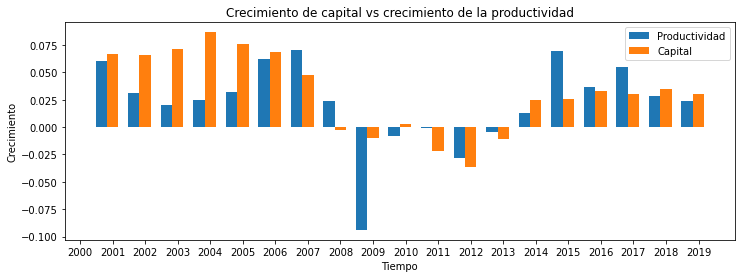

In [ ]:
numero_de_grupos=len(ga)
indice_barras=np.arange(numero_de_grupos)
ancho_barras=0.35

fig,(ax0)=plt.subplots(1,1)
plt.bar(indice_barras, ga, width=ancho_barras, label='Productividad')
plt.bar(indice_barras + ancho_barras, gk, width=ancho_barras, label='Capital' )
plt.legend(loc='best')

plt.xticks(indice_barras + ancho_barras, Fecha)

fig.set_figwidth(12)
plt.ylabel('Crecimiento')
plt.xlabel('Tiempo')
plt.title('Crecimiento de capital vs crecimiento de la productividad')
plt.show()

Como podemos ver, antes de la crisis del 2008 la mayoría del crecmiento económico venía dado por el crecimiento del capital lo cual nos cuadra con el boom inmobiliario de esos años. Sin embargo, tras esta crisis el crecimiento se vuelve mucho más compensado. 

Hay que recordar que esta es la versión más simple de este modelo. En la vida real hay muchas otras variables que determinan el crecimiento de un país. 

Por ello, si quieres buscar un modelo de Solow más realista recomiendo ir al caso de uso "Modelo de Solow: Versión avanzada" donde explico un modelo de tipo Solow diseñado por un investigador coreano que tiene en cuenta variables como tasa de empleo y educación.



#**4.Bibliografía**

Introduction to economic growth, Capítulo 2. Charles I. Jones